Retrait annuel moyen : 17.51 mètres/an
Médiane du retrait annuel : 16.72 mètres/an
Écart-type du retrait annuel : 6.31 mètres/an
Année 1935 : Retrait de 6.74 mètres/an
Année 1942 : Retrait de 15.20 mètres/an
Année 1948 : Retrait de 13.34 mètres/an
Année 1992 : Retrait de 13.75 mètres/an
Année 2002 : Retrait de 10.76 mètres/an
Année 2006 : Retrait de 16.64 mètres/an
Année 2009 : Retrait de 16.81 mètres/an
Année 2015 : Retrait de 20.51 mètres/an
Année 2017 : Retrait de 31.77 mètres/an
Année 2020 : Retrait de 18.36 mètres/an
Année 2022 : Retrait de 21.88 mètres/an
Année 2024 : Retrait de 24.35 mètres/an


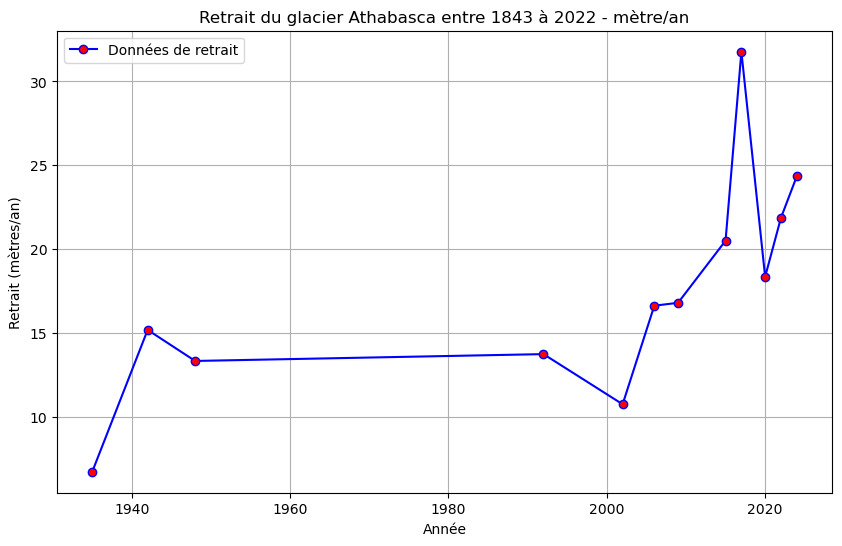

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Charger le Shapefile original contenant les points
gdf = gpd.read_file(r"D:\UQTR\Automne 2024\Ouest\retrait_glacier\point_gps_retrait.shp")

# Reprojeter si nécessaire pour travailler dans un système métrique (UTM zone 33N)
gdf = gdf.to_crs(epsg=32611)

# Convertir la colonne 'year' en type numérique
gdf['year'] = pd.to_numeric(gdf['year'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes ou années hors plage
gdf = gdf.dropna(subset=['year'])
gdf = gdf[(gdf['year'] >= 1843) & (gdf['year'] <= 2024)]

# Trier par année
gdf = gdf.sort_values(by='year').reset_index(drop=True)

# Extraire les années et géométries existantes
years_existing = gdf['year'].values
points_existing = gdf.geometry.values

# Extraire les coordonnées des points existants
x_existing = np.array([point.x for point in points_existing])
y_existing = np.array([point.y for point in points_existing])

# Calculer les distances cumulées en mètres entre les points
distances = np.sqrt(np.diff(x_existing)**2 + np.diff(y_existing)**2)
cumulative_distances = np.cumsum(distances)

# Calculer les retraits annuels (en mètres par an)
years_diff = np.diff(years_existing)
retreat_per_year = np.divide(distances, years_diff)
# Calculer les statistiques de base pour les retraits annuels
mean_retreat = np.mean(retreat_per_year)
median_retreat = np.median(retreat_per_year)
std_dev_retreat = np.std(retreat_per_year)

# Afficher les statistiques
print(f"Retrait annuel moyen : {mean_retreat:.2f} mètres/an")
print(f"Médiane du retrait annuel : {median_retreat:.2f} mètres/an")
print(f"Écart-type du retrait annuel : {std_dev_retreat:.2f} mètres/an")

# Afficher les statistiques de retrait par année
for year, retreat in zip(years_existing[1:], retreat_per_year):
    print(f"Année {year} : Retrait de {retreat:.2f} mètres/an")
# Créer un graphique du retrait par mètre/an
plt.figure(figsize=(10, 6))
plt.plot(years_existing[1:], retreat_per_year, marker='o', linestyle='-', color='blue', markerfacecolor='red', label='Données de retrait')
plt.legend()
plt.title('Retrait du glacier Athabasca entre 1843 à 2022 - mètre/an')
plt.xlabel('Année')
plt.ylabel('Retrait (mètres/an)')
plt.grid(True)

# Afficher le graphique
plt.show()

